## <font color="Purple">**PRCP-1016-Heart Diesease Prediction**</font>

### <font color="green">Problem Statement</font>

#### **The heart disease predictive model typically involves to determine whether the patient likely to have a "Heart Disease" or not with their medical and demographic features given in the data set.**

### <font color="green">Objective</font>

- [x] Create a complete **Exploratory Data Analysis**
- [x] Build a **ML Model** to **Predict** Heart Disease in people using different Machine Learning Algorithm
- [x] Give a **Suggestion** to the Hospital Sector to reduce the heart disease life threats

### <font color="green">Table of Contents</font>

- [x] <font color="brown">**Domain Analysis**</font>
- [x] <font color="brown">**Basic checks**</font>
- [x] <font color="brown">**Exploratory Data Analysis**</font>
- [x] <font color="brown">**Data Preprocessing**</font>
- [x] <font color="brown">**Label Encoding**</font>
- [x] <font color="brown">**Feature Engineering**</font>
- [x] <font color="brown">**Splitting train and test**</font>
- [x] <font color="brown">**Model Implementation**</font>
- [x] <font color="brown">**Model Evaluation**</font>
- [x] <font color="brown">**Model Comparison**</font>
- [x] <font color="brown">**Hyper parameter tuning**</font>
- [x] <font color="brown">**Model Refinement**</font>
- [x] <font color="brown">**Suggestion to Hospitals**</font>
- [x] <font color="brown">**Hardships faced**</font>
- [x] <font color="brown">**Conclusion**</font>         

### Import Basic Libraries

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [213]:
%matplotlib inline

### Import dataset

In [214]:
df1=pd.read_csv("values.csv")
df1

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


### <font color="green">Domain Analysis</font>

- From the Given provided data set, analyse the patient medical and demographic features can able to identify the pattern of the Heart disease.
- Demographic, in general refers to the statistical data related to the population or a particular group. Here in the medical studies we can say demographic features are Age, gender. 

### <font color="purple">Features to identify the Heart Disease Pattern</font>

- **patient_id**: Unique identifier for each patient.
- **slope_of_peak_exercise_st_segment**: Medical term used in cardiology, it is explain the behaviour of the ST segment on an electro gardiogram(ECG), when doing physical exercises the ST segment slowly progress towards Peak, upsloping numbered as 1 , Flat is 2 and downsloping numbered as 3.
- **thal**: Thalassemia condition describes the hemoglobin production and its function, categorised into Normal, fixed defect, reversible defect.
  fixed defect means, abnormality presents in the hemoglobin production, reversible defect means it can change under different physiological condition.
- **resting_blood_pressure**: Resting blood pressure in mm Hg.General normal blood pressure is the key indicator for the cardiovascular health. A reading of less than 120/80 mm Hg is considered normal.
- **chest_pain_type**: chest pain is an important clinical features to assess and diagnose heart conditions, categorized as(typical angina, atypical angina, non-anginal pain, asymptomatic), in the given data set valued as 1 to 4.
- **num_major_vessels**: Number of major vessels colored by fluoroscopy which is the imaging technic used to visualize the coronary arteries disease and assess the extent of it using X-ray technology, numbered as 0 to 3.
  - 0: No major vessels are significantly narrowed.
  - 1: One major vessel is significantly narrowed.
  - 2: Two major vessels are significantly narrowed.
  - 3: Three or more major vessels are significantly narrowed.
- **fasting_blood_sugar_gt_120_mg_per_dl**: the level of glucose for a person blood who have not eaten for atleast 8 hrs, the specific threshold in this context 120 mg/dl. the fasting blood sugar is >120 mg/dl is an elevated level numbered as 1 alternatively fasting blood sugar is < 120 is a normal or controlled level(1 = true; 0 = false).
- **resting_ekg_results**: Resting electrocardiogram ECG/EKG results are important in evaluating electrical activity of the heart and can help and diagnose various heart condition also normal EKG valued as 0 ,ST-T wave abnormality valued as 1 and  Left Ventricular Hypertrophy valued as 2.
- **serum_cholesterol_mg_per_dl**: The total amount of cholesterol in the blood, Guideline values are
  - Desirable Total Cholesterol: Less than 200 mg/dL.
  - Borderline High Cholesterol: 200-239 mg/dL.
  - High Cholesterol: 240 mg/dL and above.
- **oldpeak_eq_st_depression**: Refers to the ST depression induced by exercise relative to rest.measurement has done the difference between the basline level of the ST segment and at the level of maximal depression point during a stress test.Thresholds are
  - Mild: 0.5-1 mm depression
  - Moderate: 1-2 mm depression
  - Severe: >2 mm depression
- **sex**: Sex of the patient (1 = male; 0 = female).
- **age**: Age of the patient.
- **max_heart_rate_achieved**: provides the Maximum heart rate achieved during exercise stress test.
- **exercise_induced_angina**: The patients experienced chest pain during the exercise or not simply said Exercise-induced angina or not
  - No-exercise induced angina-0
  - Exercise induced angina-1

 ### <font color="green">Basic Checks</font>

In [215]:
df1.shape

(180, 14)

In [216]:
df1.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

In [217]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [218]:
df1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [219]:
df1.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [220]:
df1.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [221]:
df1.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


### <font color="green">unique values of the 14 columns</font>

In [222]:
unique_values={}
for column in df1.columns:
    unique_values[column]=df1[column].unique()
for column, values in unique_values.items():
    print("Unique values in column '{}':".format(column))
    print(values)
    print("\n")

Unique values in column 'patient_id':
['0z64un' 'ryoo3j' 'yt1s1x' 'l2xjde' 'oyt4ek' 'ldukkw' '2gbyh9' 'daa9kp'
 '3nwy2n' '1r508r' 'ldg4b9' 'xc17yq' 'mpggsq' 'zlyac8' 'f06u72' '2fv3rc'
 'qyrkxn' '237mql' 'mc750a' '30v796' 'cvux3j' 'k8899q' 'jhdvtb' '5g9v0h'
 '83asqd' 'gla0im' 'zzmfh7' 'f4g1ay' 'lek9q9' '8265rl' '6017a1' 'z7xkou'
 'k7ef7h' '0n5fu0' '55xksg' 'pjgqa3' 'xkdz7j' 'tpuevg' 'ascl42' '1xwoe6'
 'ty4ik8' 'gx6yxl' 'hlmts5' 'yx0q6k' 'ep1o51' 'gj1e5z' '6219kl' 'rp9g6x'
 '1aeaff' 'y3prof' '3drd48' 'ejo7p3' 'r7y4i1' 'mznwxv' '27oevk' 'jwqi3k'
 '328lkl' 'tlk9o8' 'aq2vrq' 'ilogfb' 'rv6siv' 'm2a4i9' 'pwigd8' 'qwapdq'
 '4sd1xn' 'nck22c' 'm6zksp' 'f70grj' 'k1art8' 'mcwqgs' '3jsjqk' 'ik7hfs'
 'qwj1yf' 'qvhk9e' 'igwnqo' '4v0q7o' 'hh2awp' 'vfjppl' '6lu42b' 'shiro4'
 '3wl3z4' 'ebioez' '37c0vm' 'v52zcs' '6nkcaw' 'hfp05i' 'grfxwd' 'bvcxah'
 'i49srr' '93dbhq' 'jscmp8' 'zaytyf' 'wze8qm' 'w3933i' '7uch9x' 'dy5hxt'
 'c0gkqc' 'z5g5p3' 'h3uzv8' 'bthqr4' 'rfj25e' '9f92et' '24fopx' 'ldr1mz'
 'wokyol' 'p5

### Insights:
- Among 180 rows and 14 columns, only patient id, thal has the object type and old peak has float data type rest of all the columns are integer data type
- So the two object types has to be encoded while preprocessing
- From the descriptive analysis, concluded that the blood sugar level cannot be zero, so that should be imputed
- From The thal column, we observed that more than 50% of the patient's hemoglobin level is normal

### <font color="green">Renaming Columns</font>

In [223]:
df1.rename(columns={'slope_of_peak_exercise_st_segment':'ST seg','resting_blood_pressure':'BP','chest_pain_type':'Chest pain','fasting_blood_sugar_gt_120_mg_per_dl':'fasting Bp','resting_ekg_results':'ekg results','serum_cholesterol_mg_per_dl':'cholesterol',
                         'oldpeak_eq_st_depression':'old peak','max_heart_rate_achieved':'Heart rate','exercise_induced_angina':'exerangina'},inplace=True)

In [224]:
df1

,patient_id,ST seg,thal,BP,Chest pain,num_major_vessels,fasting Bp,ekg results,cholesterol,old peak,sex,age,Heart rate,exerangina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [225]:
df2=pd.read_csv("labels.csv")
df2.rename(columns={'heart_disease_present':'target'},inplace=True)
df2

,patient_id,target
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


### <font color="green">Merging Target column with the input feature</font>

In [226]:
df=pd.concat([df1,df2['target']],axis=1)
df

,patient_id,ST seg,thal,BP,Chest pain,num_major_vessels,fasting Bp,ekg results,cholesterol,old peak,sex,age,Heart rate,exerangina,target
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [227]:
df_num=df.select_dtypes(exclude="object")
df_num

,ST seg,BP,Chest pain,num_major_vessels,fasting Bp,ekg results,cholesterol,old peak,sex,age,Heart rate,exerangina,target
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [228]:
df_cat=df.select_dtypes(include="object")
df_cat

,patient_id,thal
0,0z64un,normal
1,ryoo3j,normal
2,yt1s1x,normal
3,l2xjde,reversible_defect
4,oyt4ek,reversible_defect
...,...,...
175,5qfar3,reversible_defect
176,2s2b1f,normal
177,nsd00i,reversible_defect
178,0xw93k,normal


### <font color="purple">Task1:</font> <font color="green">Exploratory Data Analysis</font>

### Univariate Analysis

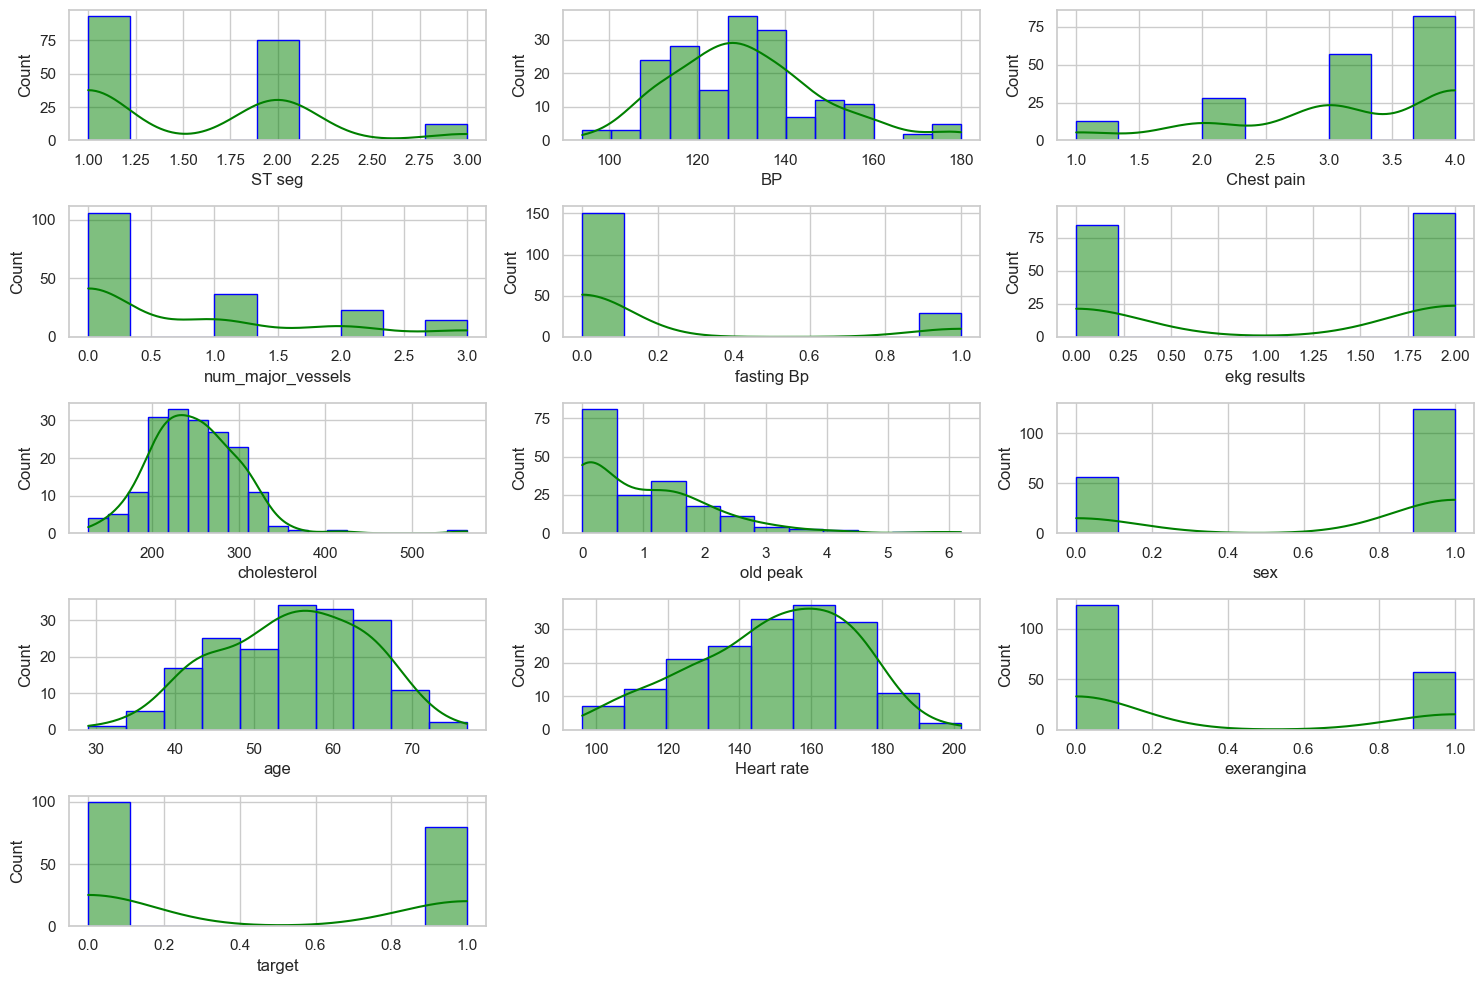

In [229]:
plt.figure(figsize=(15,10), facecolor="white")
plotnum=1
for column in df_num:
    if plotnum<=15:
        ax=plt.subplot(5,3,plotnum)
        sns.histplot(x=df_num[column], color="green", edgecolor="blue",kde=True)
        plotnum += 1 
    plt.tight_layout()
plt.show()

### Insights:

- male patient is more than the female patient 
- most of the patient's lies around the age of 50-65
- maximum number of patients experienced no chest pain while exercise induced
- Most patients are having high Bp range between 120-140
- fasting BP level is normal for most of the patient in the data set
- on seeing coronory artery disease patients, No vessals are significantly narrowed for maximum patients

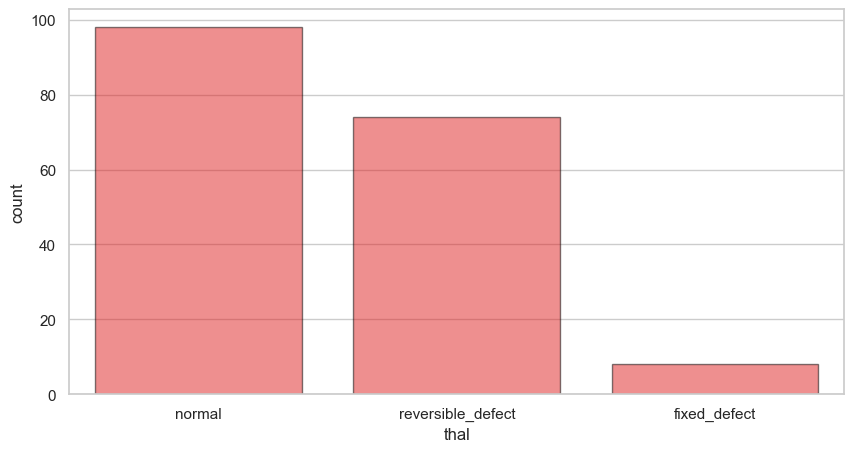

In [230]:
plt.figure(figsize=(10,5), facecolor="white")
sns.countplot(data=df_cat,x=df_cat['thal'], color="red",edgecolor='black',alpha=0.5)
plt.show()

### Insights:
- most patient's have the thalassemia condition as normal
- fixed defect condition is very few of the patients
- Reversible defect is moderately high

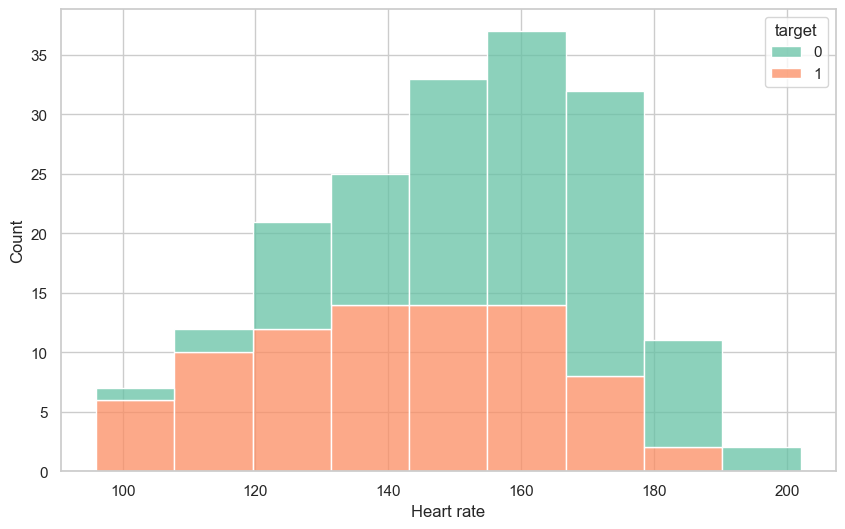

In [231]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Heart rate', hue='target', multiple='stack', palette='Set2')
plt.show()

### Insights:
- From the stacked histplot it allows the comparison between two groups i)Patient with heart rate(Target=1) ii)Patient without heart rate(Target=0)
- The count of patients with and without heart disease can be easily guessed by interpreting this plot
- For example - there are roughly 14 people with heart disease and around 35 people without heart disease if their heart rate lies between 130-170bpm.

### Bivariate Analysis

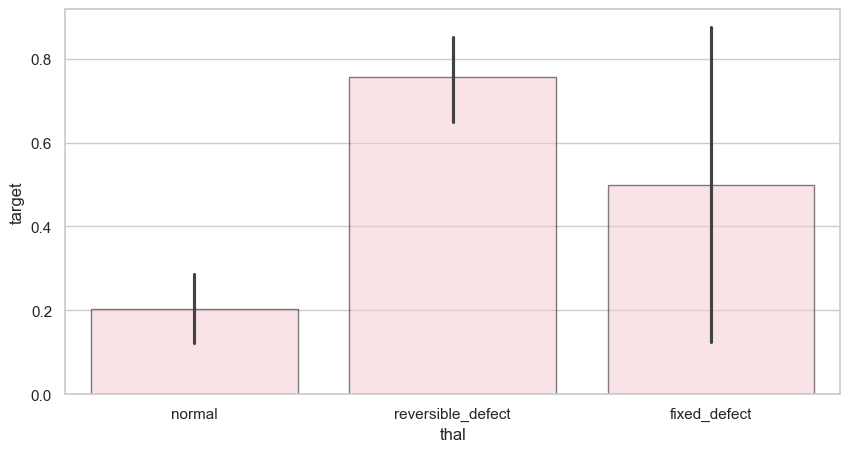

In [232]:
plt.figure(figsize=(10,5), facecolor="white")
sns.barplot(data=df,x=df['thal'], y=df['target'],color="pink",edgecolor='black',alpha=0.5)
plt.show()

### Insights:
- when thal condition is normal patient's are less chance to get heart disease
- reversible defect, high chances to get disease
- fixed defect means, the patient's have moderate chance to get disease

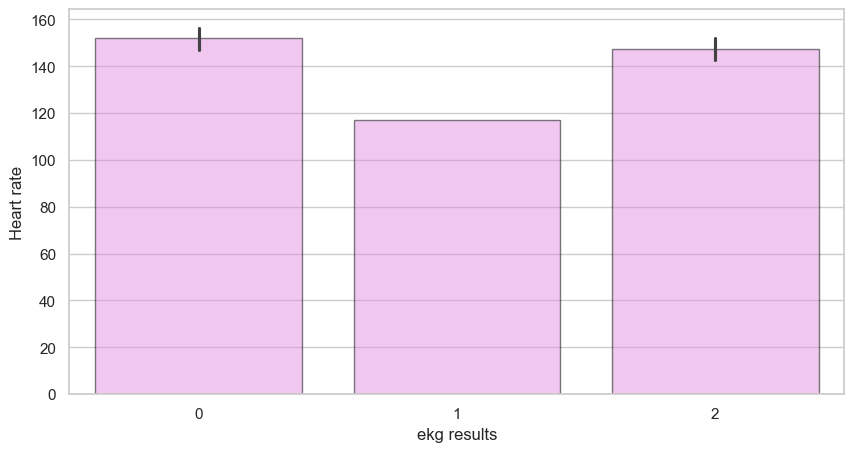

In [233]:
plt.figure(figsize=(10,5), facecolor="white")
sns.barplot(data=df,x=df['ekg results'], y=df['Heart rate'],color="violet",edgecolor='black',alpha=0.5)
plt.show()

### Insights:
- There is no conclusive insights when comparing EKG results with heart rate
- The ekg results are equally distributed for the heart rates
- The T-wave abnormality patients got the heart rate upto 120 bpm

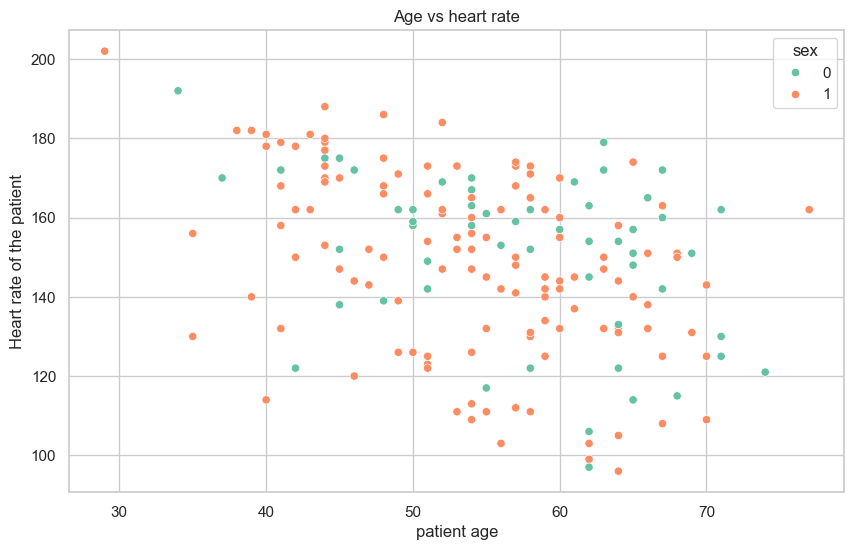

In [234]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=df,x='age',y='Heart rate',hue='sex',palette='Set2')
ax.set_title('Age vs heart rate')
ax.set_xlabel("patient age")
ax.set_ylabel("Heart rate of the patient")
plt.show()


<Axes: xlabel='age', ylabel='cholesterol'>

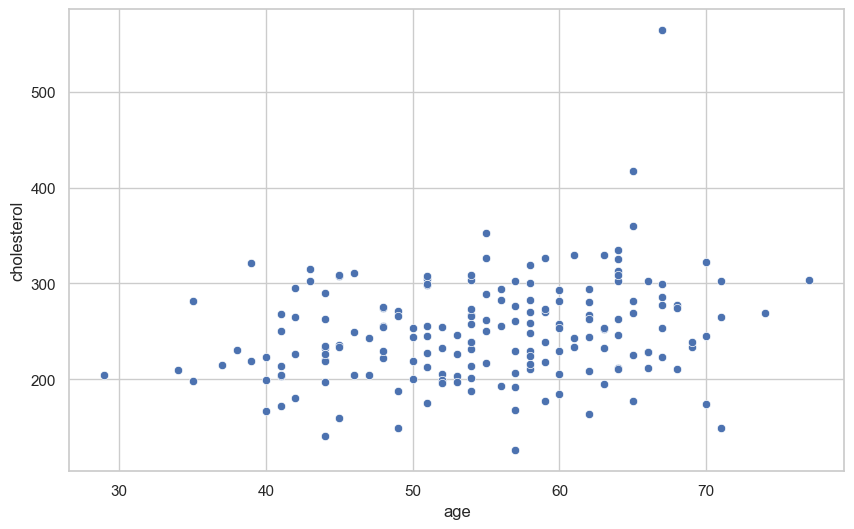

In [235]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='age',y='cholesterol',palette='Set2')

Text(0, 0.5, 'Count')

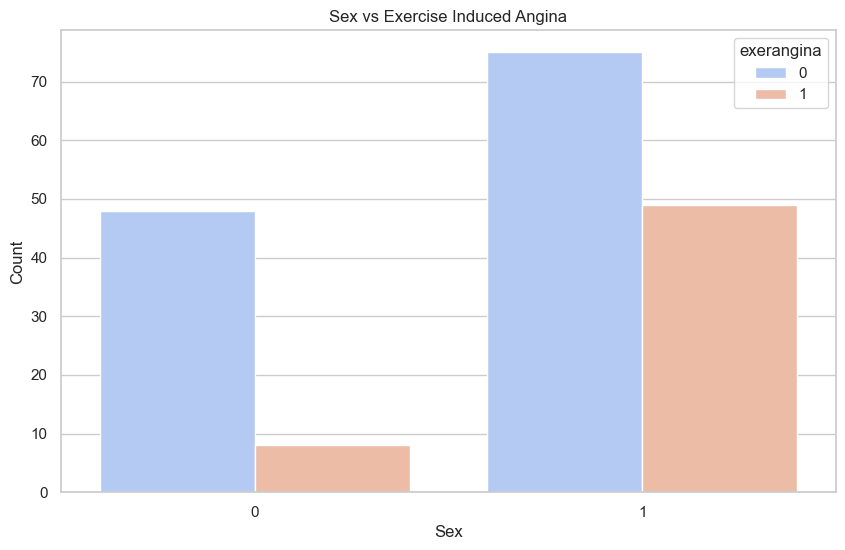

In [236]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='sex', hue='exerangina', data=df, palette='coolwarm')
ax.set_title('Sex vs Exercise Induced Angina')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')

### Insights:
- comparetively male patient's got NO chest pain when induced exercise than the female patient
- vice versa chest pain happend when exercise induced that is also male patient's comparitively high


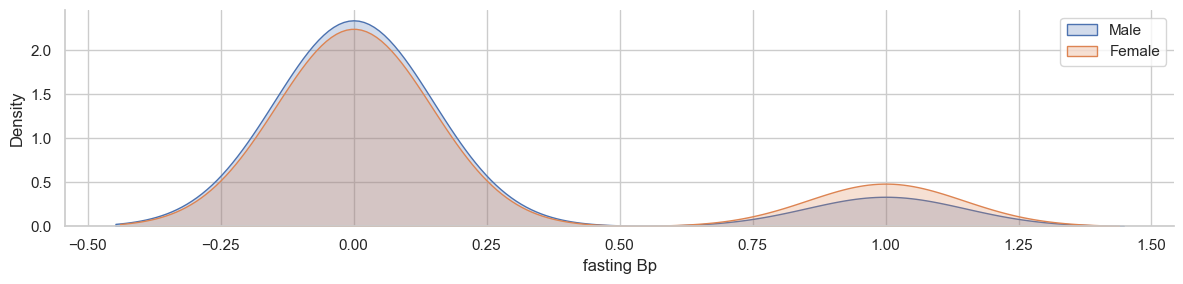

In [237]:
g=sns.FacetGrid(df, hue='sex', aspect=4)
g.map(sns.kdeplot,'fasting Bp', shade=True)
plt.legend(labels=['Male','Female'])

### Insights:
- The KDE plots for males and females are overlaid, making it easy to compare the distributions of fasting blood pressure for both sexes
- By looking on the peaks and spread of the KDE plots to understand where the density of data points is highest for each sex
- On closer inspection it indicates that males tend to have higher fasting blood pressure values on average

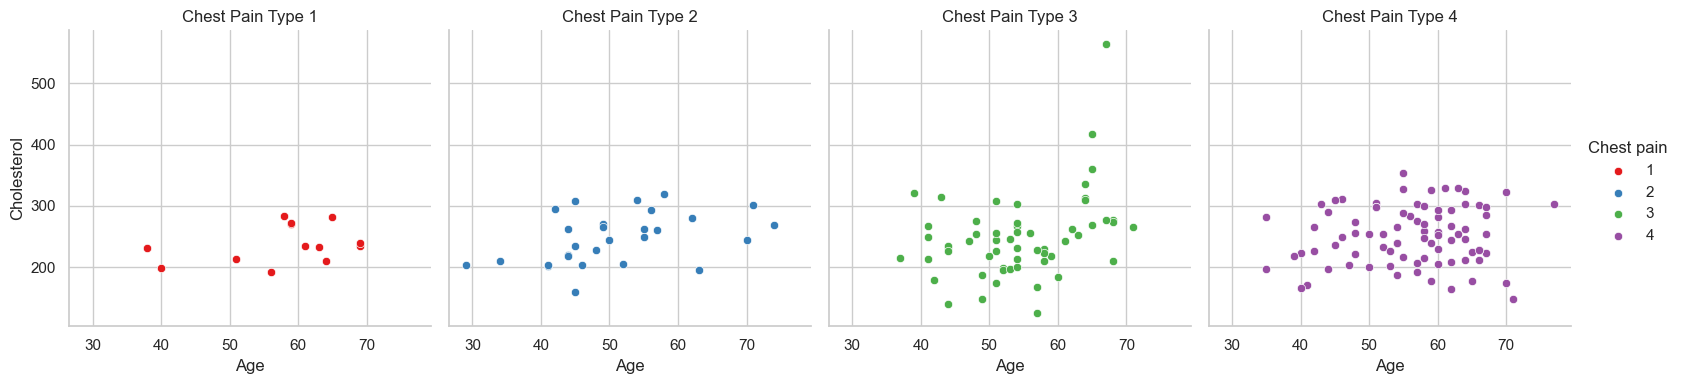

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create the FacetGrid with 'chest_pain_type' as the column variable
g = sns.FacetGrid(df, col='Chest pain', hue='Chest pain', palette='Set1', col_wrap=4, height=4)

g.map(sns.scatterplot, 'age', 'cholesterol')

# Add titles and labels
g.set_axis_labels('Age', 'Cholesterol')
g.set_titles('Chest Pain Type {col_name}')
g.add_legend()

# Display the plot
plt.show()


### Insights:
- Most of the patient's affected by chest pain Type 3 and 4
- Age between 60-70 patient's with high cholestrol having chest pain Type3
- Typical angina chest pain type patients are having border high level of cholestrol between 200-300

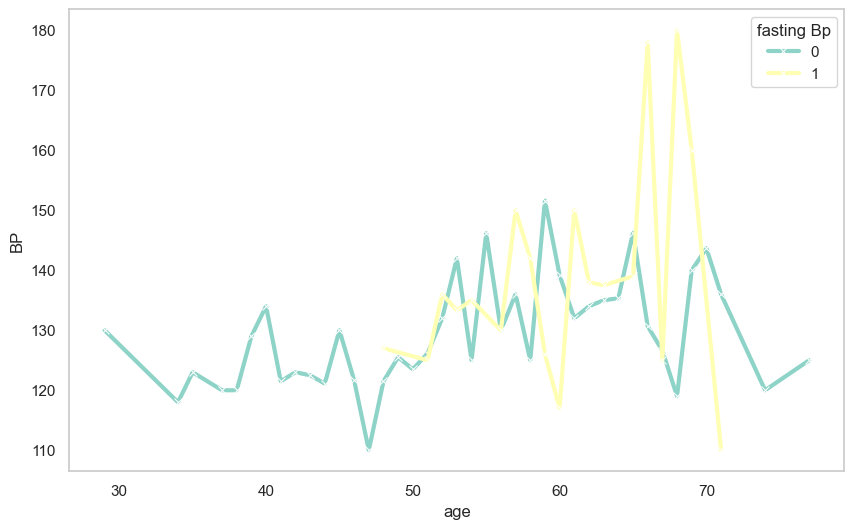

In [239]:
plt.figure(figsize=(10, 6), dpi=100)

# Plot resting blood pressure
sns.lineplot(data=df, x='age', y='BP', hue='fasting Bp', palette='Set3', marker='x', linestyle='-', linewidth=3, ci=None, legend=True)
plt.grid(False)
plt.gca().set_facecolor('none')
plt.show()

### Insights:
- patient's are having fasting Bp at elevated level from the age of 50 only 
- between the age of 30-50, patients are having more or less normal and low Bp level

### Multivariate Analysis


<Figure size 10000x10000 with 0 Axes>

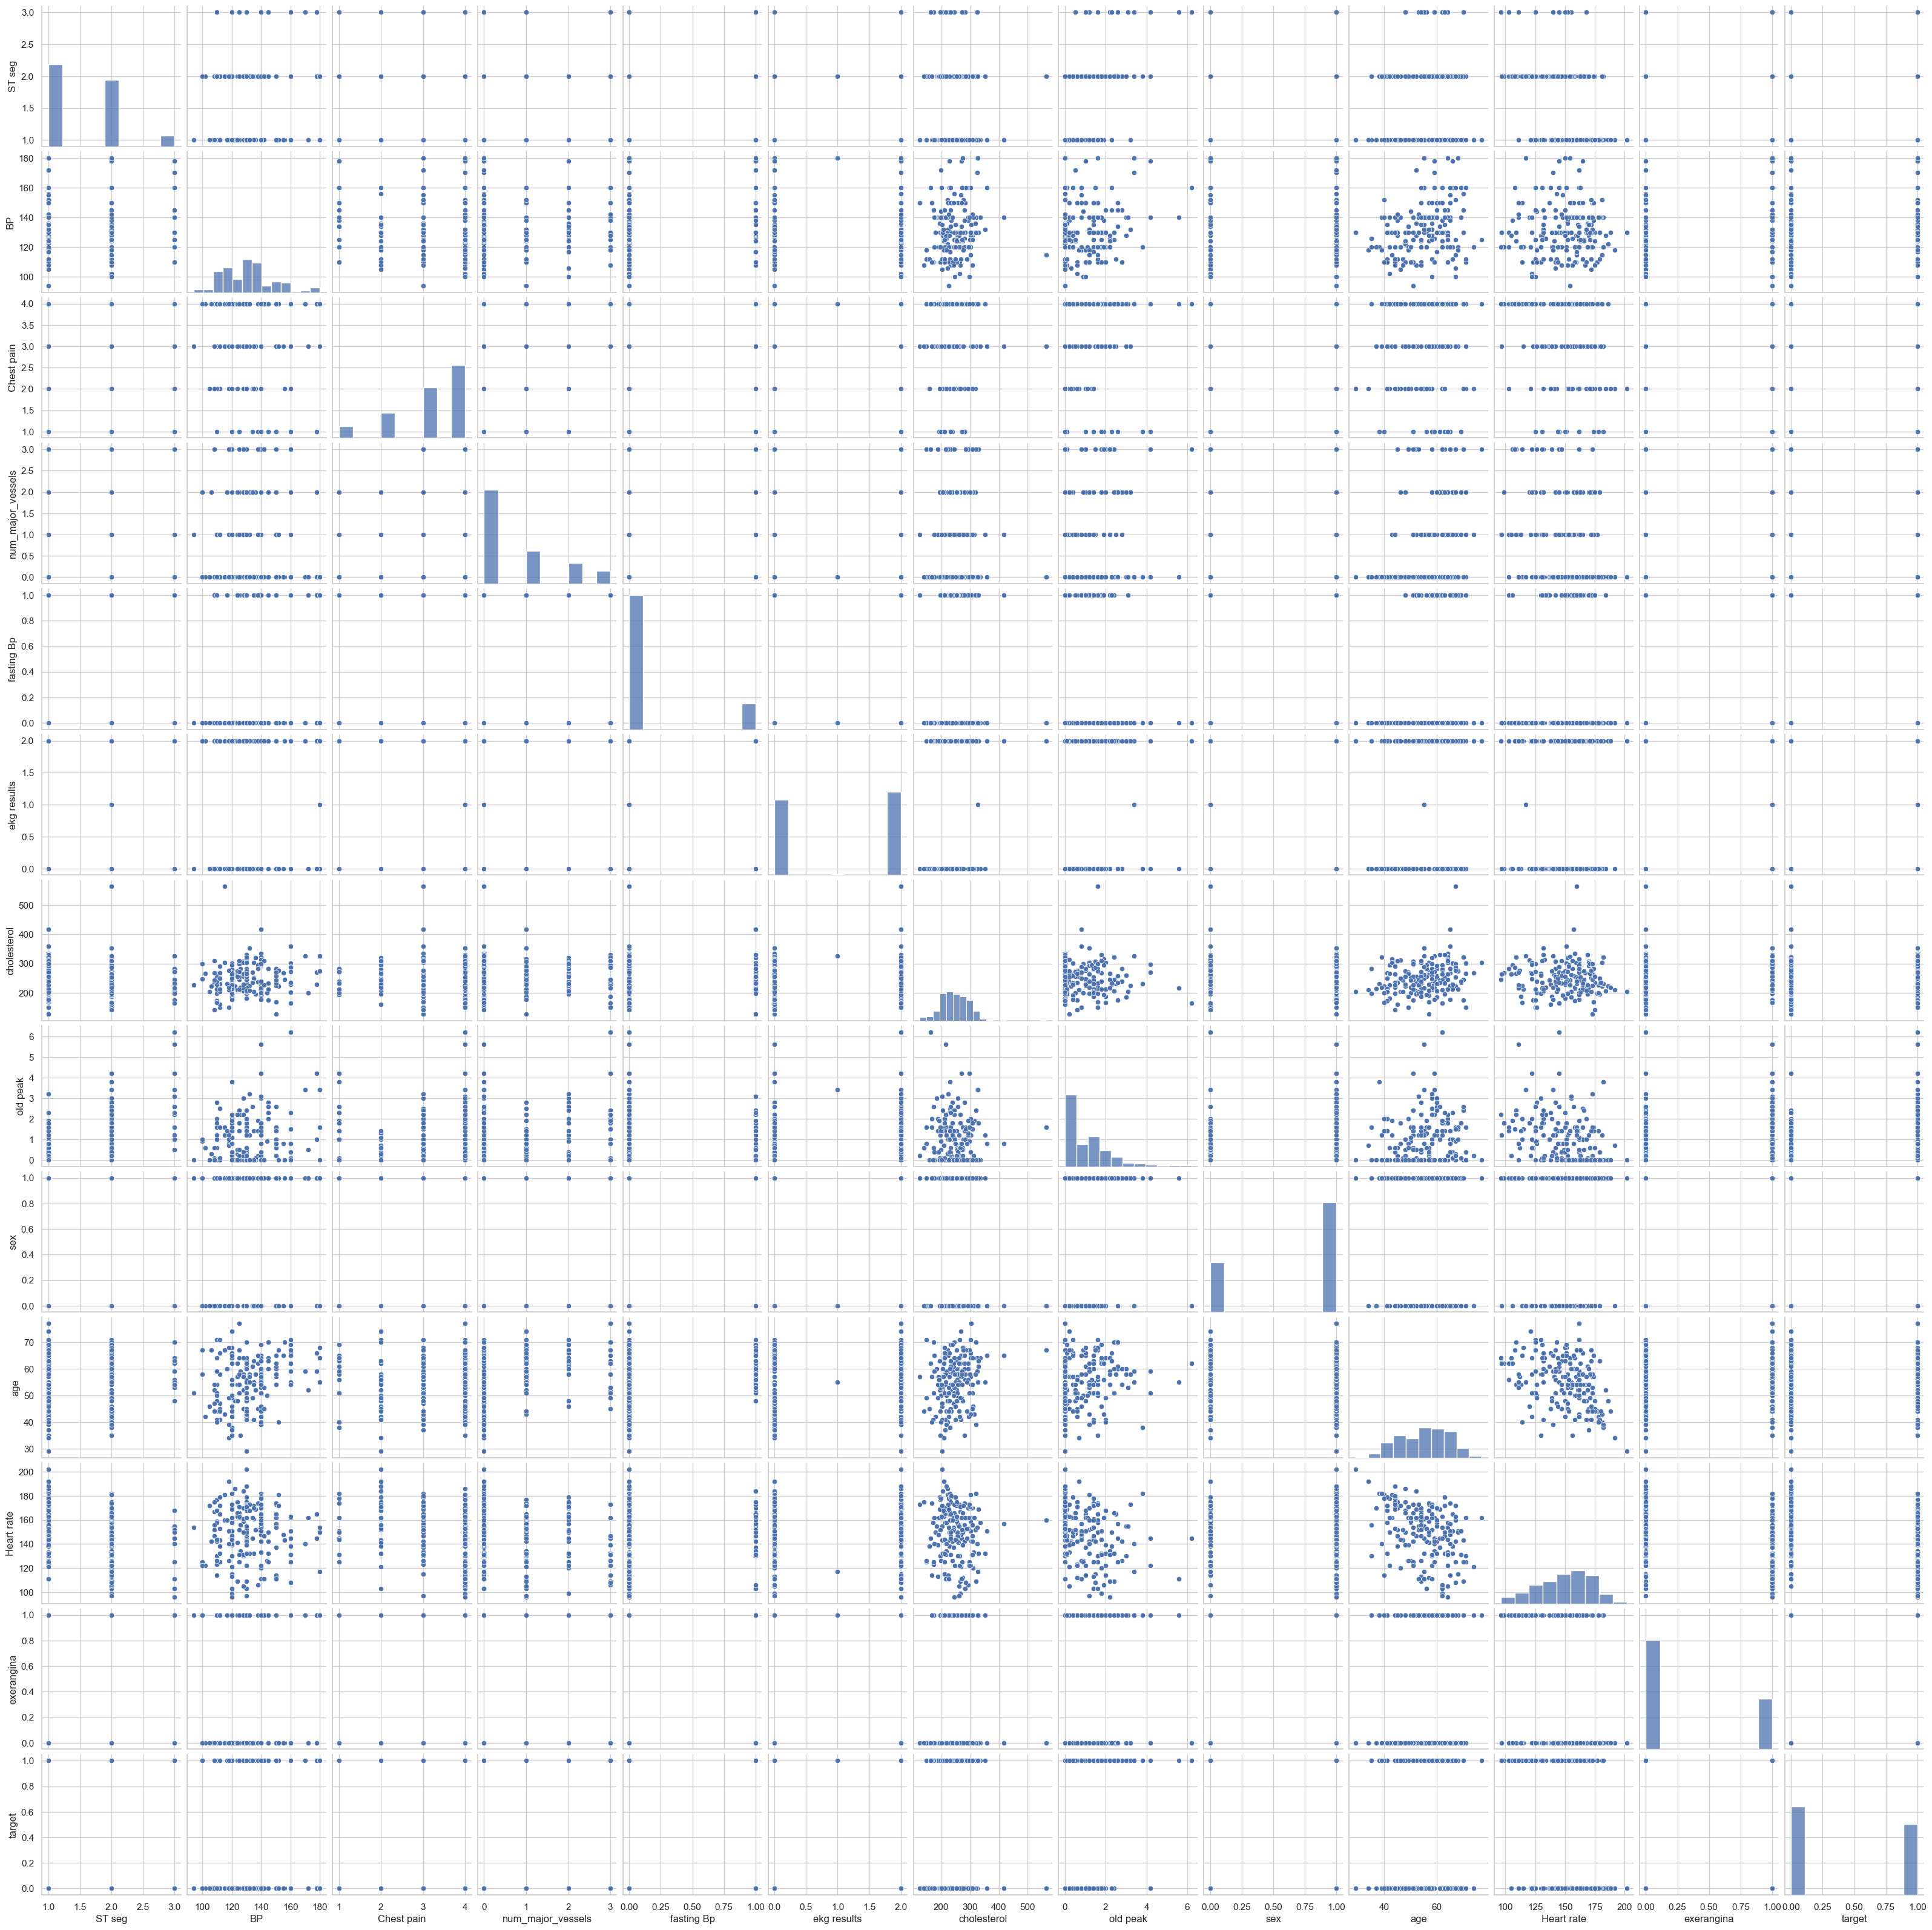

In [240]:
plt.figure(figsize=(100,100))
sns.pairplot(df)
plt.show()

### <font color="green">Data Preprocessing</font>


### Checking for missing values

In [241]:
df.isnull().sum()

patient_id           0
ST seg               0
thal                 0
BP                   0
Chest pain           0
num_major_vessels    0
fasting Bp           0
ekg results          0
cholesterol          0
old peak             0
sex                  0
age                  0
Heart rate           0
exerangina           0
target               0
dtype: int64

In [115]:
df.duplicated().sum()

0

### Insights:
- There is no missing values
- No duplicate values to drop

### Outliers

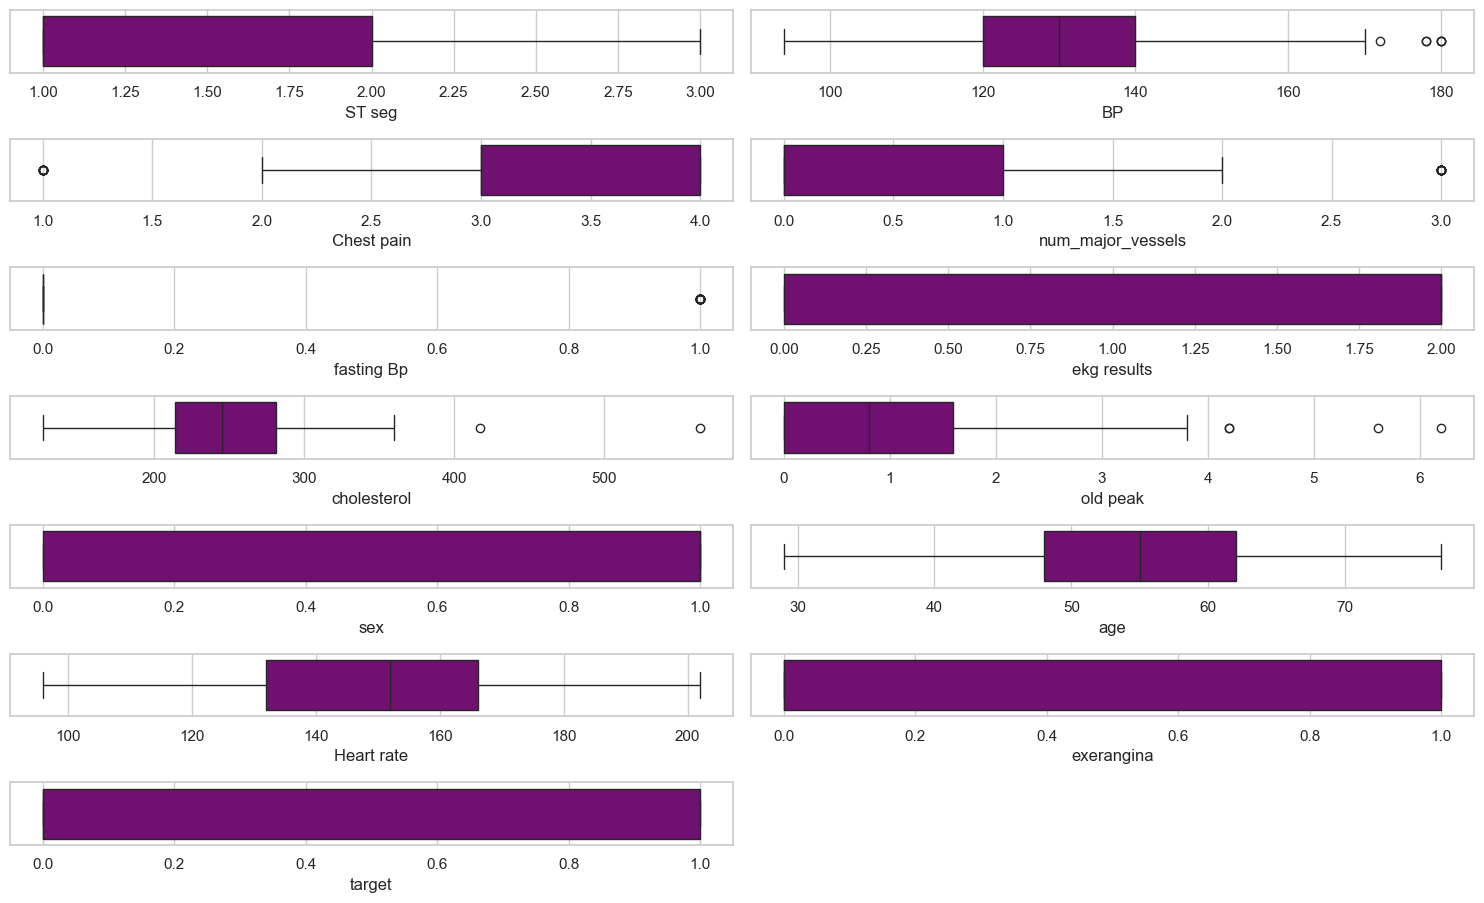

In [242]:
plt.figure(figsize=(15,10), facecolor="white")
plotnum=1
for column in df_num:
    if plotnum<=16:
        ax=plt.subplot(8,2,plotnum)
        sns.boxplot(x=df_num[column], color="purple")
        plotnum += 1 
    plt.tight_layout()
plt.show()

In [244]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3-Q1

min_value = Q1-1.5*IQR

max_value = Q3+1.5*IQR

outliers_count = ((df_num>max_value) | (df_num<min_value)).sum()

outliers_percentage = (outliers_count/len(df_num))*100
outliers_percentage

ST seg                0.000000
BP                    3.333333
Chest pain            7.222222
num_major_vessels     7.777778
fasting Bp           16.111111
ekg results           0.000000
cholesterol           1.111111
old peak              2.222222
sex                   0.000000
age                   0.000000
Heart rate            0.000000
exerangina            0.000000
target                0.000000
dtype: float64

In [245]:
outliers_count

ST seg                0
BP                    6
Chest pain           13
num_major_vessels    14
fasting Bp           29
ekg results           0
cholesterol           2
old peak              4
sex                   0
age                   0
Heart rate            0
exerangina            0
target                0
dtype: int64

### Handling outliers using IQR 

In [246]:
#BP column has 6 outliers /3.3%  - Normal 
Q1 = df["BP"].quantile(0.25)
Q3 = df["BP"].quantile(0.75)

IQR = Q3-Q1

min_limit = Q1-1.5*IQR
max_limit = Q3+1.5*IQR

df.loc[(df["BP"]<min_limit) | (df["BP"]>max_limit),"BP"] =df["BP"].mean()

In [247]:
#cholesterol has 2 outlier /1.1% - Normal
Q1 = df["cholesterol"].quantile(0.25)
Q3 = df["cholesterol"].quantile(0.75)

IQR = Q3-Q1

min_limit = Q1-1.5*IQR
max_limit = Q3+1.5*IQR

df.loc[(df["cholesterol"]<min_limit) | (df["cholesterol"]>max_limit),"cholesterol"] =df["cholesterol"].mean()

In [248]:
df.loc[(df["cholesterol"]<min_limit) | (df["cholesterol"]>max_limit),"cholesterol"]

Series([], Name: cholesterol, dtype: float64)

In [249]:
# Old peak has 4 outlier /2.2% -Skewed
Q1 = df["old peak"].quantile(0.25)
Q3 = df["old peak"].quantile(0.75)

IQR = Q3-Q1

min_limit = Q1-1.5*IQR
max_limit = Q3+1.5*IQR

df.loc[(df["old peak"]<min_limit) | (df["old peak"]>max_limit),"old peak"] =df["old peak"].median()

In [250]:
df.loc[(df["old peak"]<min_limit) | (df["old peak"]>max_limit),"old peak"]

Series([], Name: old peak, dtype: float64)

### <font color="green">Label Encoding</font>

In [251]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df['patient_id']=lc.fit_transform(df['patient_id'])
df['thal']=lc.fit_transform(df['thal'])

In [252]:
df

,patient_id,ST seg,thal,BP,Chest pain,num_major_vessels,fasting Bp,ekg results,cholesterol,old peak,sex,age,Heart rate,exerangina,target
0,6,1,1,128.000000,2,0,0,2,308.0,0.0,1,45,170,0,0
1,147,2,1,110.000000,3,0,0,0,214.0,1.6,0,54,158,0,0
2,172,1,1,125.000000,4,3,0,2,304.0,0.0,1,77,162,1,1
3,112,1,2,152.000000,4,0,0,0,223.0,0.0,1,40,181,0,1
4,133,3,2,131.311111,1,0,0,2,270.0,0.8,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,40,2,2,125.000000,4,2,1,0,254.0,0.2,1,67,163,0,1
176,22,2,1,131.311111,4,0,0,1,327.0,3.4,0,55,117,1,1
177,131,2,2,125.000000,3,0,0,0,309.0,1.8,1,64,131,1,1
178,5,1,1,124.000000,3,2,1,0,255.0,0.0,1,48,175,0,0


### <font color="green">Feature Selection</font>

<Axes: >

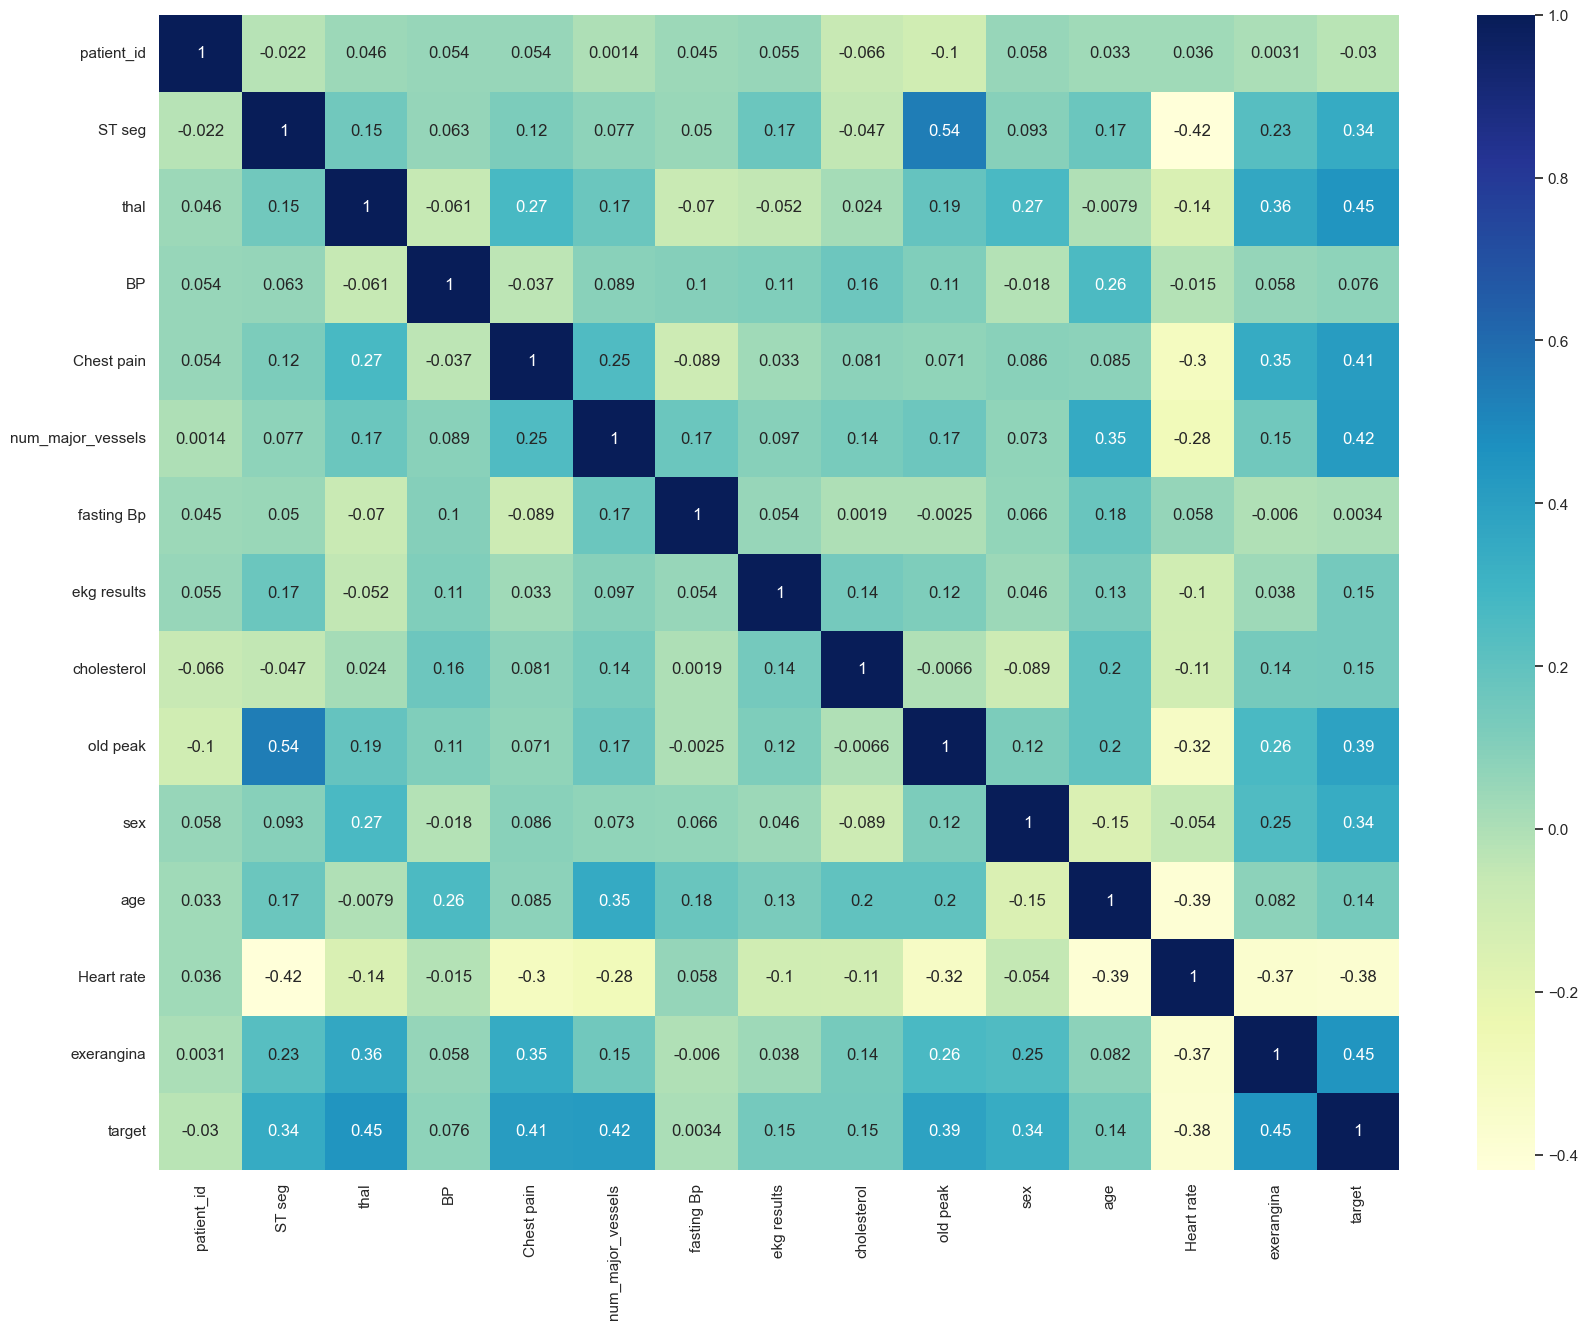

In [253]:
plt.figure(figsize=(20,15))
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True , cmap='YlGnBu')

### Insights:
- Findings from the heat map is there is no any correlation between the independent variables
- there are 14 columns in the data set contain 180 rows so no need for feature selection
- we are going to train the model with available columns for better results
- Tree based algorithms are working better in non linear data


### <font color="green">Spilitting X and y 

In [254]:
X=df.drop('target', axis=1)
X

,patient_id,ST seg,thal,BP,Chest pain,num_major_vessels,fasting Bp,ekg results,cholesterol,old peak,sex,age,Heart rate,exerangina
0,6,1,1,128.000000,2,0,0,2,308.0,0.0,1,45,170,0
1,147,2,1,110.000000,3,0,0,0,214.0,1.6,0,54,158,0
2,172,1,1,125.000000,4,3,0,2,304.0,0.0,1,77,162,1
3,112,1,2,152.000000,4,0,0,0,223.0,0.0,1,40,181,0
4,133,3,2,131.311111,1,0,0,2,270.0,0.8,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,40,2,2,125.000000,4,2,1,0,254.0,0.2,1,67,163,0
176,22,2,1,131.311111,4,0,0,1,327.0,3.4,0,55,117,1
177,131,2,2,125.000000,3,0,0,0,309.0,1.8,1,64,131,1
178,5,1,1,124.000000,3,2,1,0,255.0,0.0,1,48,175,0


In [255]:
y=df.target
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: target, Length: 180, dtype: int64

### <font color="green">Train test split</font>

In [256]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

### <font color="green">Scaling</font>


In [141]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(x_train)
# x_test=sc.transform(x_test)

### <font color="green">Model Implementation </font>
- ### <font color="green">Logistic Regression</font>

In [279]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=20)
log.fit(x_train,y_train)


LogisticRegression(random_state=20)

In [280]:
y_pred_log=log.predict(x_test)
y_pred_log

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

### <font color="green">Model Evaluation </font>

In [281]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

In [306]:
score_log=round(accuracy_score(y_test,y_pred_log)*100,2)
print("The accuracy score of logistic regression is {} %".format(score_log))

The accuracy score of logistic regression is 77.78 %


In [286]:
cm_log=confusion_matrix(y_test,y_pred_log)


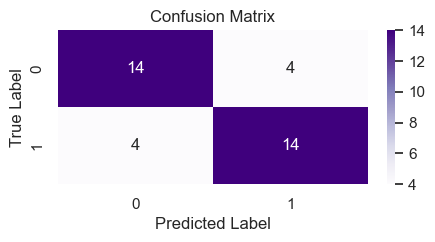

In [287]:
plt.figure(figsize=(5, 2))
ax=sns.heatmap(cm_log, annot=True, fmt='d', cmap='Purples', xticklabels=log.classes_, yticklabels=log.classes_)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

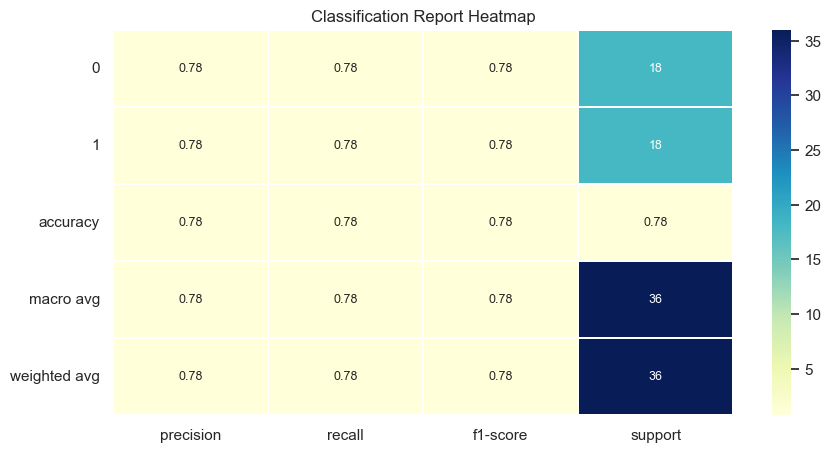

In [288]:
report = classification_report(y_test, y_pred_log, output_dict=True)

# Convert to DataFrame
report_log=pd.DataFrame(report).transpose()
reql=report_log.iloc[:,:]
# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(reql, annot=True, cmap='YlGnBu', linewidths=0.2, annot_kws={"size": 9})
plt.title('Classification Report Heatmap')
plt.show()

### <font color="Purple">Task 2:</font> <font color="green">Predicting Models using various ML algorithms</font>

- ### <font color="green">SVM </font>

In [303]:
from sklearn import svm
sv=svm.SVC(kernel='linear',random_state=17)
sv.fit(x_train,y_train)

SVC(kernel='linear', random_state=17)

In [304]:
y_pred_sv=sv.predict(x_test)
y_pred_sv

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [305]:
score_sv=round(accuracy_score(y_test,y_pred_sv)*100,2)
print("The accuracy score of SVC is: {}%" .format(score_sv))

The accuracy score of SVC is: 75.0%


In [307]:
cm_svc=confusion_matrix(y_test,y_pred_sv)


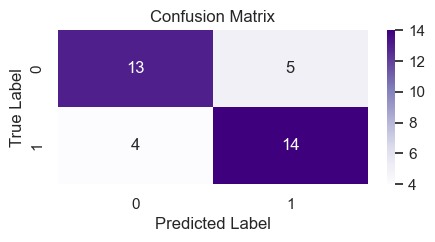

In [308]:
plt.figure(figsize=(5, 2))
ax=sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Purples', xticklabels=log.classes_, yticklabels=log.classes_)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

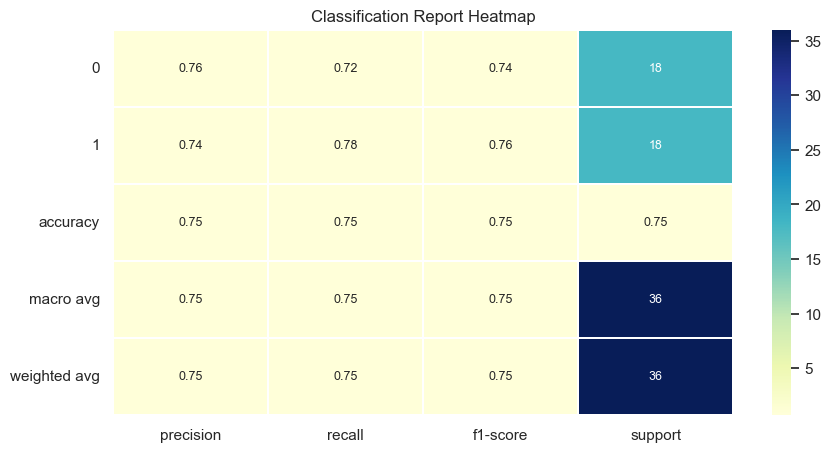

In [309]:
report = classification_report(y_test, y_pred_sv, output_dict=True)

# Convert to DataFrame
report_svc=pd.DataFrame(report).transpose()
reqsv=report_svc.iloc[:,:]
# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(reqsv, annot=True, cmap='YlGnBu', linewidths=0.2, annot_kws={"size": 9})
plt.title('Classification Report Heatmap')
plt.show()

### <font color="green">Model Comparison </font>

In [363]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [389]:
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

In [435]:
from sklearn.metrics import accuracy_score, classification_report

# ANSI escape codes for colors
class_colors = {
    'green': '\033[92m',
    'cyan': '\033[96m',
    'yellow': '\033[93m',
    'magenta': '\033[95m',
    'blue': '\033[94m',
    'bold': '\033[1m',
    'end': '\033[0m'
}


for name, model in models.items():
    print(f"{class_colors['bold']}{class_colors['blue']}Training {name}...{class_colors['end']}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{class_colors['bold']}{class_colors['green']}{name} Accuracy: {accuracy:.2f}{class_colors['end']}\n")
    print(f"{class_colors['bold']}{class_colors['cyan']}Classification Report for {name}:{class_colors['end']}\n")
    print(classification_report(y_test, y_pred))
    print("\n")



Training KNN...
KNN Accuracy: 0.67

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.65      0.72      0.68        18
           1       0.69      0.61      0.65        18

    accuracy                           0.67        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.67      0.67      0.67        36



Training Random Forest...
Random Forest Accuracy: 0.75

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.76      0.72      0.74        18

    accuracy                           0.75        36
   macro avg       0.75      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36



Training Gradient Boosting...
Gradient Boosting Accuracy: 0.81

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           

In [453]:
accuracies={}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name]=accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")


KNN Accuracy: 0.67
Random Forest Accuracy: 0.78
Gradient Boosting Accuracy: 0.81
XGBoost Accuracy: 0.78
Naive Bayes Accuracy: 0.78
MLP Neural Network Accuracy: 0.86


### <font color="brown"> Plotting the comparison </font> 

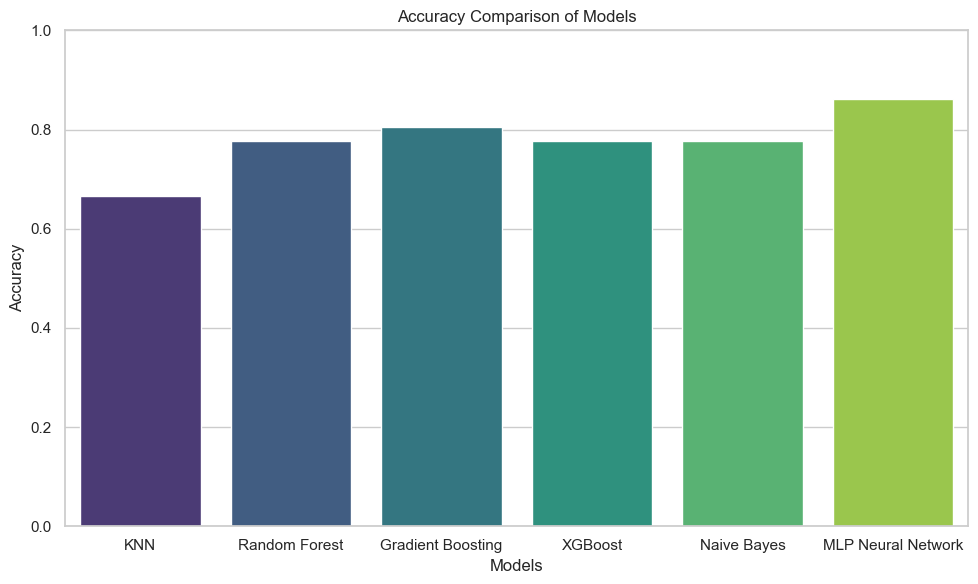

In [454]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
ax.set_title('Accuracy Comparison of Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.ylim(0.0, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Insights:

- Ennsemble technic Gradient boosting gives the accuracy score of 81%
- In neural network, MLP classifier gives 86 % accuracy which trains the model with maximum accuracy
- KNN Classifiers gives the least accuracy score among other models
- Other three models(Random Forest, XGboost, Naive Bayes) are equally achieved 78%

### <font color="green">Hyper parameter Tuning</font>
- ### <font color="blue">Gradient Boosting</font>

In [477]:
from sklearn.model_selection import GridSearchCV
gbc = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50,100],   # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
# set up Grid search CV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model
grid_search.fit(x_train,y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best parameter and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.5, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-validation Accuracy: 0.8408866995073891


In [481]:
best_model =GradientBoostingClassifier(**best_params)
best_model.fit(x_train,y_train)
y_pred_gbc = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_gbc)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8055555555555556


In [482]:
best_params

{'learning_rate': 0.5,
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

### Insights:
- when performing hyper parameter tuning **Grid search Cv** suggests the best parameters for the model optimization 
- Best Parameters are **{'learning_rate': 0.5, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}**
- Best Cross-validation Accuracy: 84 % but the model accuracy score is near to **81%**
- steps for the **Model refinement**
 - [x] Collecting more data.
 - [x] Feature engineering to improve the quality of inputs.
 - [x] Trying different models or ensembles.
 - [x] Fine-tuning hyperparameters further.

### <font color="brown">Model refinement:</font> <font color="green">Balancing</font>

In [485]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [496]:
smote=SMOTE(random_state=42)
#apply smote for resample
x_train_res,y_train_res=smote.fit_resample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_res))

Counter({0: 82, 1: 62})
Counter({0: 82, 1: 82})


In [497]:
# Initialize the classifier
model = GradientBoostingClassifier()

# Train the model on the resampled training data
model.fit(x_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.76      0.72      0.74        18

    accuracy                           0.75        36
   macro avg       0.75      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36



In [498]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the classifier
model =DecisionTreeClassifier()

# Train the model on the resampled training data
model.fit(x_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74        18
           1       0.75      0.67      0.71        18

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.73      0.72      0.72        36



### Insights:
- Using SMOTE-Synthetic Minority Over-sampling Technique for Balancing the sample values x_train and y_train
- while balancing for Gbc algorithm accuracy reduced from 81 to 75
- for DT model gives 72% accuracy
- concluded with No SMOTE using this data set, but for more data model will perform good as we are expecting

### <font color="purple">Task3:</font> <font color="green">Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats</font>

- Heart disease model prediction helps to the Hospital sector to identify the disease before it reaches the high risk level, I am suggesting below points to predict the heart disease at earlier stage and prevents the patient's life.

### <font color="purple">Do routine check-ups</font>
- Integrate a validated heart disease prediction model into routine checkups, focusing on patients with established risk factors like hypertension, diabetes, high cholesterol, obesity, and family history
- Use the model to identify early signs of heart disease, enabling timely intervention and management

### <font color="purple">Personalized Treatment Plans</font>
-  Utilize the model to identify patients at high risk for developing heart disease. This allows for early intervention and development of personalized treatment plans
- Design and implement preventive measures, such as lifestyle modifications, medications, or interventions, based on the prediction model’s output

### <font color="purple">Improve Data Collection and Integration</font>
- Ensure the complete Up to date EHR -Electronic Health records for all patients and integrate them with the predictive model for enhanced predictive output from the model
- update model with the new data to improve the prediction that will reflects the new advancements in the disease


### <font color="purple">Continuous Improvement</font>
- Implement continuous monitoring systems for high-risk patients identified by the prediction model. These systems can alert healthcare providers to any significant changes in a patient’s condition. we can incorporate model to the smart wearable or an app to monitor the health and alert the patients

### <font color="purple">Research and Development</font>
- Participate in or initiate clinical trials to validate and refine the heart disease prediction model, contributing to the broader medical community’s understanding and capabilities in this field


### <font color="brown">Hardships Faced</font>
- In this dataset it contains medical terminology as a feature which was hard to interpret and understand
- Data set has insufficient number of rows that can't help much in prediction that we expect
- The fields are already grouped so while plotting for fetching insights it is difficult to remember the groups it belongs to
- Hyper paramenter tuning doesn't gives more accuracy because the range of hyperparameters being explored might be too narrow or not optimal. Expanding the search space or using different ranges might yield better results
- Some algorithms might inherently struggle with certain types of data or relationships present in the heart disease dataset

### <font color="brown">Conclusion</font>
- In our ongoing efforts to improve patient care and prevent life-threatening heart conditions, we propose leveraging our heart disease prediction model
- This advanced model can significantly enhance our ability to predict and prevent heart disease, leading to better patient outcomes
- We can create this model to an working application that can be deployed in smart wearables that would help both patients and medics at the time of initial stage itself
- we suggested the usage of the model in realtime prediction to the hospitals which will result in earlier detection of the disease